# COVID-19로 인한 중국인 관광객 감소 추이 데이터 분석

### 1. 데이터 수집 및 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
df=pd.read_excel('C:/Users/82105/kto_201901.xlsx', header=1,usecols='A:G', skipfooter=4 )

In [90]:
df

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570
...,...,...,...,...,...,...,...
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526


### 2. 데이터 전처리

In [91]:
df['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [92]:
dele_list=['아시아주','아시아 기타','미주','GCC','미주 기타','구주','구주 기타','대양주','대양주 기타','아프리카주','아프리카 기타','기타대륙','국적미상','교포소계','교포']

In [93]:
# 특정 row열 지우기
condition=(df.국적.isin(dele_list) == False)
condition_df=df[condition]
condition_df['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', '미국', '캐나다', '멕시코', '브라질',
       '영국', '독일', '프랑스', '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이',
       '벨기에', '오스트리아', '스페인', '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나',
       '러시아', '크로아티아', '루마니아', '불가리아', '폴란드', '오스트레일리아', '뉴질랜드',
       '남아프리카공화국'], dtype=object)

In [94]:
condition_df.head()

,국적,관광,상용,공용,유학/연수,기타,계
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570
5,태국,34004,37,199,96,6998,41334


In [105]:
# 인덱스 값 초기화
condition_df = condition_df.reset_index(drop=True)
condition_df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,관광객 비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,96.26
1,대만,86393,74,22,180,1285,87954,2019-01,98.23
2,홍콩,34653,59,2,90,1092,35896,2019-01,96.54
3,마카오,2506,2,0,17,45,2570,2019-01,97.51
4,태국,34004,37,199,96,6998,41334,2019-01,82.27


In [106]:
# 기준년월 추가
condition_df['기준년월']='2019-01'
condition_df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,관광객 비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,96.26
1,대만,86393,74,22,180,1285,87954,2019-01,98.23
2,홍콩,34653,59,2,90,1092,35896,2019-01,96.54
3,마카오,2506,2,0,17,45,2570,2019-01,97.51
4,태국,34004,37,199,96,6998,41334,2019-01,82.27


In [107]:
# 국적별 관광객 비율 파악
condition_df['관광객 비율(%)']= round((condition_df['관광']/ condition_df['계'])*100,2)


In [108]:
condition_df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,관광객 비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,96.26
1,대만,86393,74,22,180,1285,87954,2019-01,98.23
2,홍콩,34653,59,2,90,1092,35896,2019-01,96.54
3,마카오,2506,2,0,17,45,2570,2019-01,97.51
4,태국,34004,37,199,96,6998,41334,2019-01,82.27
5,말레이시아,19043,95,7,99,2821,22065,2019-01,86.30
6,필리핀,14279,211,161,184,15638,30473,2019-01,46.86
7,인도네시아,14183,136,38,187,4298,18842,2019-01,75.27
8,싱가포르,8372,94,8,48,1333,9855,2019-01,84.95
9,미얀마,1304,10,31,67,3877,5289,2019-01,24.65


In [109]:
# 관광객 수가 가장 많은 국가
condition_ds= condition_df.sort_values(by='관광객 비율(%)',ascending=False)
condition_ds.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,관광객 비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,98.23
3,마카오,2506,2,0,17,45,2570,2019-01,97.51
2,홍콩,34653,59,2,90,1092,35896,2019-01,96.54
0,일본,198805,2233,127,785,4576,206526,2019-01,96.26
19,이스라엘,727,12,0,9,57,805,2019-01,90.31


In [110]:
# 중국 관광객만 필터링
condition1=(condition_df['국적'] == '중국')
condition_df[condition1]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,관광객 비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,81.49


In [111]:
# 2019년 1월 한국 방문 관광객 총 합
tourist_sum = sum(condition_df['관광'])
tourist_sum

876476

In [116]:
# 전체 외국인 관광객 대비 나라별 관광 인원
condition_df['전체비율']= round((condition_df['관광']/tourist_sum)*100,1)
condition_df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,관광객 비율(%),전체비율
17,중국,320113,2993,138,8793,60777,392814,2019-01,81.49,36.5
0,일본,198805,2233,127,785,4576,206526,2019-01,96.26,22.7
1,대만,86393,74,22,180,1285,87954,2019-01,98.23,9.9
23,미국,42989,418,2578,229,16523,62737,2019-01,68.52,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,96.54,4.0


In [120]:
# 함수생성
def create_data(yy,mm):
    # 1. 불러 올 엑셀 파일 경로를 지정
    file_path = 'C:/Users/82105/file/kto_{}{}.xlsx'.format(yy,mm)
    
    # 2. 엑셀 파일 불러오기
    df = pd.read_excel(file_path, header=1, skipfooter=4 , usecols= 'A:G')
    
    # 3. '기준년월' 칼럼 추가
    df['기준년월']='{}-{}'.format(yy,mm)
    
    # 4. '국적' 칼럼에서 대륙 제거하고 국가만 남기기
    dele_list=['아시아주','아시아 기타','미주','GCC','미주 기타','구주','구주 기타','대양주','대양주 기타','아프리카주','아프리카 기타','기타대륙','국적미상','교포소계','교포']
    condition = (df['국적'].isin(dele_list)==False)
    df_country = df[condition].reset_index(drop=True)
    
    # 5. 국가별 "관광객 비율(%)" 칼럼 추가
    df_country['관광객 비율(%)'] = round((df_country['관광']/df_country['계'])*100,1)
    
    # 6. "전체비율(%)" 칼럼추가
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round((df_country['관광']/tourist_sum)*100, 1)
    
    # 7. 결과 출력 
    return df_country

In [130]:
# 이중 반복문 사용  # zfill() 문자열 함수 앞에 0을 채워주는 함수
for yy in range(2010,2021):
    for mm in range(1,13):
        mm_str=str(mm).zfill(2)
        yymm= '{}{}'.format(yy,mm_str)
        print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012


In [129]:
mm=1
print(str(mm).zfill(2))

01


In [138]:
# 새로운 빈 DF를 만들어서 통합
df=pd.DataFrame()

for yy in range(2010,2021):
    for mm in range(1,13):
        temp=create_data(str(yy),str(mm).zfill(2))
        df=df.append(temp)

C:\Users\82105\AppData\Local\Temp\ipykernel_14068\183706588.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\183706588.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\183706588.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\183706588.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\183706588.py:7: FutureWarning: The frame.append method is deprecated a

C:\Users\82105\AppData\Local\Temp\ipykernel_14068\183706588.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\183706588.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\183706588.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\183706588.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\183706588.py:7: FutureWarning: The frame.append method is deprecated a

C:\Users\82105\AppData\Local\Temp\ipykernel_14068\183706588.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\183706588.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\183706588.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\183706588.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\183706588.py:7: FutureWarning: The frame.append method is deprecated a

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/82105/file/kto_202006.xlsx'

In [139]:
df.tail(20)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,관광객 비율(%),전체비율(%)
32,스위스,0,0,0,5,23,28,2020-05,0.0,0.0
33,이탈리아,10,12,1,0,156,179,2020-05,5.6,0.2
34,덴마크,9,2,0,0,28,39,2020-05,23.1,0.1
35,노르웨이,2,4,0,0,49,55,2020-05,3.6,0.0
36,벨기에,1,3,0,0,175,179,2020-05,0.6,0.0
37,오스트리아,0,1,0,0,108,109,2020-05,0.0,0.0
38,스페인,16,5,2,2,42,67,2020-05,23.9,0.3
39,그리스,80,6,0,0,79,165,2020-05,48.5,1.3
40,포르투갈,2,0,0,1,161,164,2020-05,1.2,0.0
41,핀란드,0,3,0,1,51,55,2020-05,0.0,0.0


In [157]:
# 2020.06월 데이터가 없기에 에러가 뜬 것이다. 이럴 때는 예외조항을 조건문으로 넣어주면 된다.
# try 구문과 except 함수를 사용하면 된다.
df=pd.DataFrame()

for yy in range(2010,2021):
    for mm in range(1,13):
        try:
            temp=create_data(str(yy),str(mm).zfill(2))
            df=df.append(temp)
        
        except:
            pass

C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated a

C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated a

C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated a

C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\518867338.py:9: FutureWarning: The frame.append method is deprecated a

In [161]:
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,관광객 비율(%),전체비율(%)
47,불가리아,13,0,0,0,31,44,2020-05,29.5,0.2
48,폴란드,40,1,1,0,98,140,2020-05,28.6,0.7
49,오스트레일리아,30,5,0,0,102,137,2020-05,21.9,0.5
50,뉴질랜드,4,0,2,1,33,40,2020-05,10.0,0.1
51,남아프리카공화국,1,0,3,0,25,29,2020-05,3.4,0.0


In [162]:
# 엑셀로 저장
df.to_excel('C:/Users/82105/file/kto_total.xlsx',index=False)

In [164]:
condition=(df['국적'] == '중국')
df_filter = df[condition]
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,관광객 비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,44.3,10.2
17,중국,60590,7907,68,29546,42460,140571,2010-02,43.1,13.7
17,중국,50330,13549,174,14924,62480,141457,2010-03,35.6,9.3
17,중국,84252,13306,212,2199,47711,147680,2010-04,57.1,15.6
17,중국,89056,12325,360,2931,49394,154066,2010-05,57.8,17.1
...,...,...,...,...,...,...,...,...,...,...
17,중국,393336,2813,99,10433,75000,481681,2020-01,81.7,38.5
17,중국,49520,715,11,20753,33087,104086,2020-02,47.6,10.0
17,중국,5040,115,2,7388,4050,16595,2020-03,30.4,16.4
17,중국,522,71,0,1112,2230,3935,2020-04,13.3,10.2


In [165]:
# 중국인 관광객 파일만 저장
df_filter.to_excel('C:/Users/82105/file/kto_total.xlsx',index=False)

In [167]:
len(df_filter['국적'])

125

In [168]:
# 그래프에서 한글 표기위한 글꼴 변경 코드
from matplotlib import font_manager, rc
import platform 

if platform.system() == "Windows":
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)

## 3) 시각화

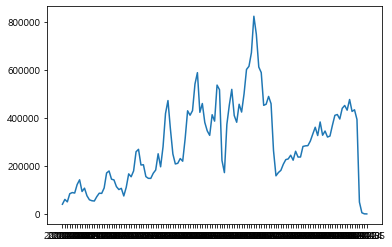

In [169]:
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

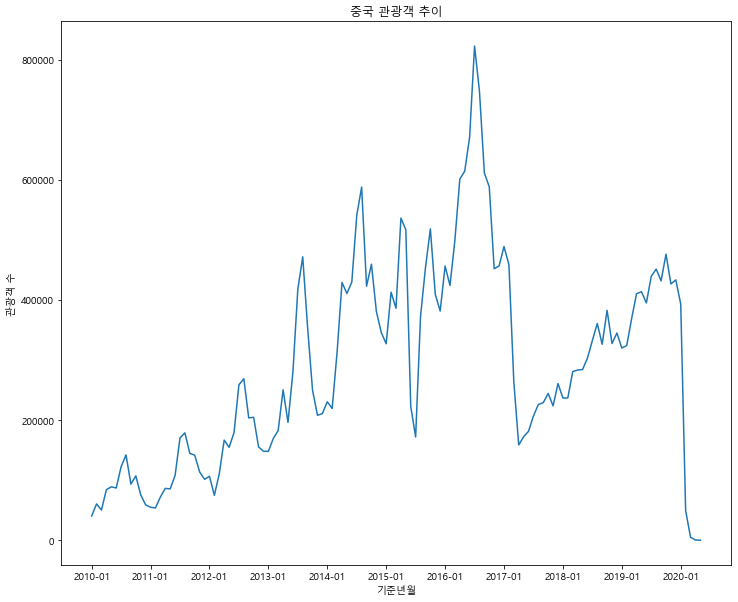

In [174]:
# 그래프 보기 편하게 변환

# 그래프 크기 조절
plt.figure(figsize=(12,10))

# 그래프 내용 설정
plt.plot(df_filter['기준년월'], df_filter['관광'])

# 그래프 타이틀, X축 ,Y축 이름 설정
plt.title('중국 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객 수')

# X 축 눈금 값 설정
plt.xticks(['2010-01', '2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01',])

plt.show()


In [177]:
# 히트맵 이용해서 그래프 만들기
df_filter['년도'] = df_filter['기준년월'].str.slice(0,4)
df_filter['월'] = df_filter['기준년월'].str.slice(5,7)

C:\Users\82105\AppData\Local\Temp\ipykernel_14068\1427656091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['년도'] = df_filter['기준년월'].str.slice(0,4)
C:\Users\82105\AppData\Local\Temp\ipykernel_14068\1427656091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['월'] = df_filter['기준년월'].str.slice(5,7)


In [178]:
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,관광객 비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,44.3,10.2,2010,01
17,중국,60590,7907,68,29546,42460,140571,2010-02,43.1,13.7,2010,02
17,중국,50330,13549,174,14924,62480,141457,2010-03,35.6,9.3,2010,03
17,중국,84252,13306,212,2199,47711,147680,2010-04,57.1,15.6,2010,04
17,중국,89056,12325,360,2931,49394,154066,2010-05,57.8,17.1,2010,05
...,...,...,...,...,...,...,...,...,...,...,...,...
17,중국,393336,2813,99,10433,75000,481681,2020-01,81.7,38.5,2020,01
17,중국,49520,715,11,20753,33087,104086,2020-02,47.6,10.0,2020,02
17,중국,5040,115,2,7388,4050,16595,2020-03,30.4,16.4,2020,03
17,중국,522,71,0,1112,2230,3935,2020-04,13.3,10.2,2020,04


In [180]:
# 피벗테이블로 형태 변환
df_pivot = df_filter.pivot_table(values='관광', index='년도', columns='월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [181]:
# 히트맵 설정을 위한 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

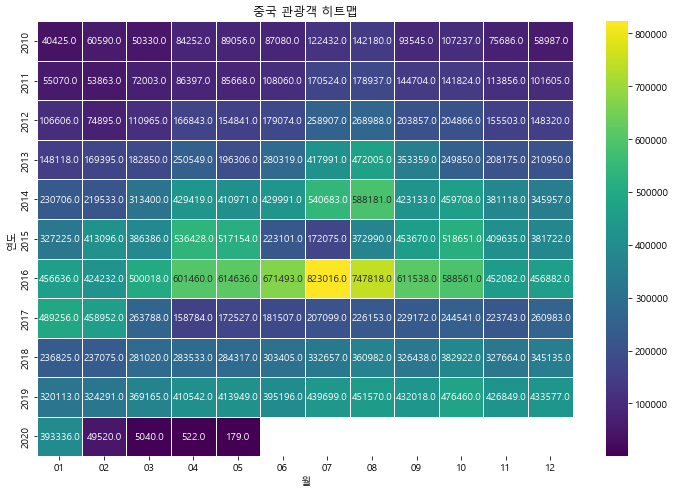

In [207]:
# 히트맵 그리기
# 그래프 크기 설정
plt.figure(figsize=(12,8))

# 히트맵 그리기
sns.heatmap(df_pivot, annot=True, fmt='.1f', cmap='viridis', linewidths=0.5) 
'''
annot=True : 히트맵 그래프에 각 칸에 실제 값 표시
fmt='.1f' : 소수점 첫째 자리 까지 나타내겠다는 의미
cmap : 색깔 표시
linewidths = 0.5 : 기준선을 정해서 해당 두께로 표시하겠다는 의미

'''


# 그래프 title, x, y축 이름 설정
plt.title('중국 관광객 히트맵')
plt.xlabel('월')
plt.ylabel('연도')

plt.show()


## 4) 결론

#### 1) 메르스 여파 2015.06 - 2016.08

#### (2) 사드배치 보복 2017.03

#### (3) 코로나19 2020.02